In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
co2_data = pd.read_csv('co2_emissions.csv')
co2_data.head(5)

,End Use,Sector,CO2 emissions
0,Space Heating,Residential,273.50
1,Space Cooling,Residential,111.43
2,Water Heating,Residential,139.38
3,Refrigeration,Residential,51.01
4,Cooking,Residential,28.95


In [3]:
by_sector=co2_data.groupby(['Sector'])['CO2 emissions'].sum().reset_index()
by_sector.head(5)

,Sector,CO2 emissions
0,Biogenic Energy Combustion,550.62
1,Commercial,922.43
2,Industrial Manufacturing,1154.27
3,Industrial Non-Manufacturing,259.85
4,Residential,1034.49


In [4]:
by_enduse=co2_data.groupby(['Sector','End Use'])['CO2 emissions'].sum().reset_index()
by_enduse.head(5)

,Sector,End Use,CO2 emissions
0,Biogenic Energy Combustion,Biodiesel,22.61
1,Biogenic Energy Combustion,Biofuels Heat and Coproducts,75.80
2,Biogenic Energy Combustion,Biogenic Waste,24.30
3,Biogenic Energy Combustion,Biomass,173.22
4,Biogenic Energy Combustion,Electric Power Sector,8.48


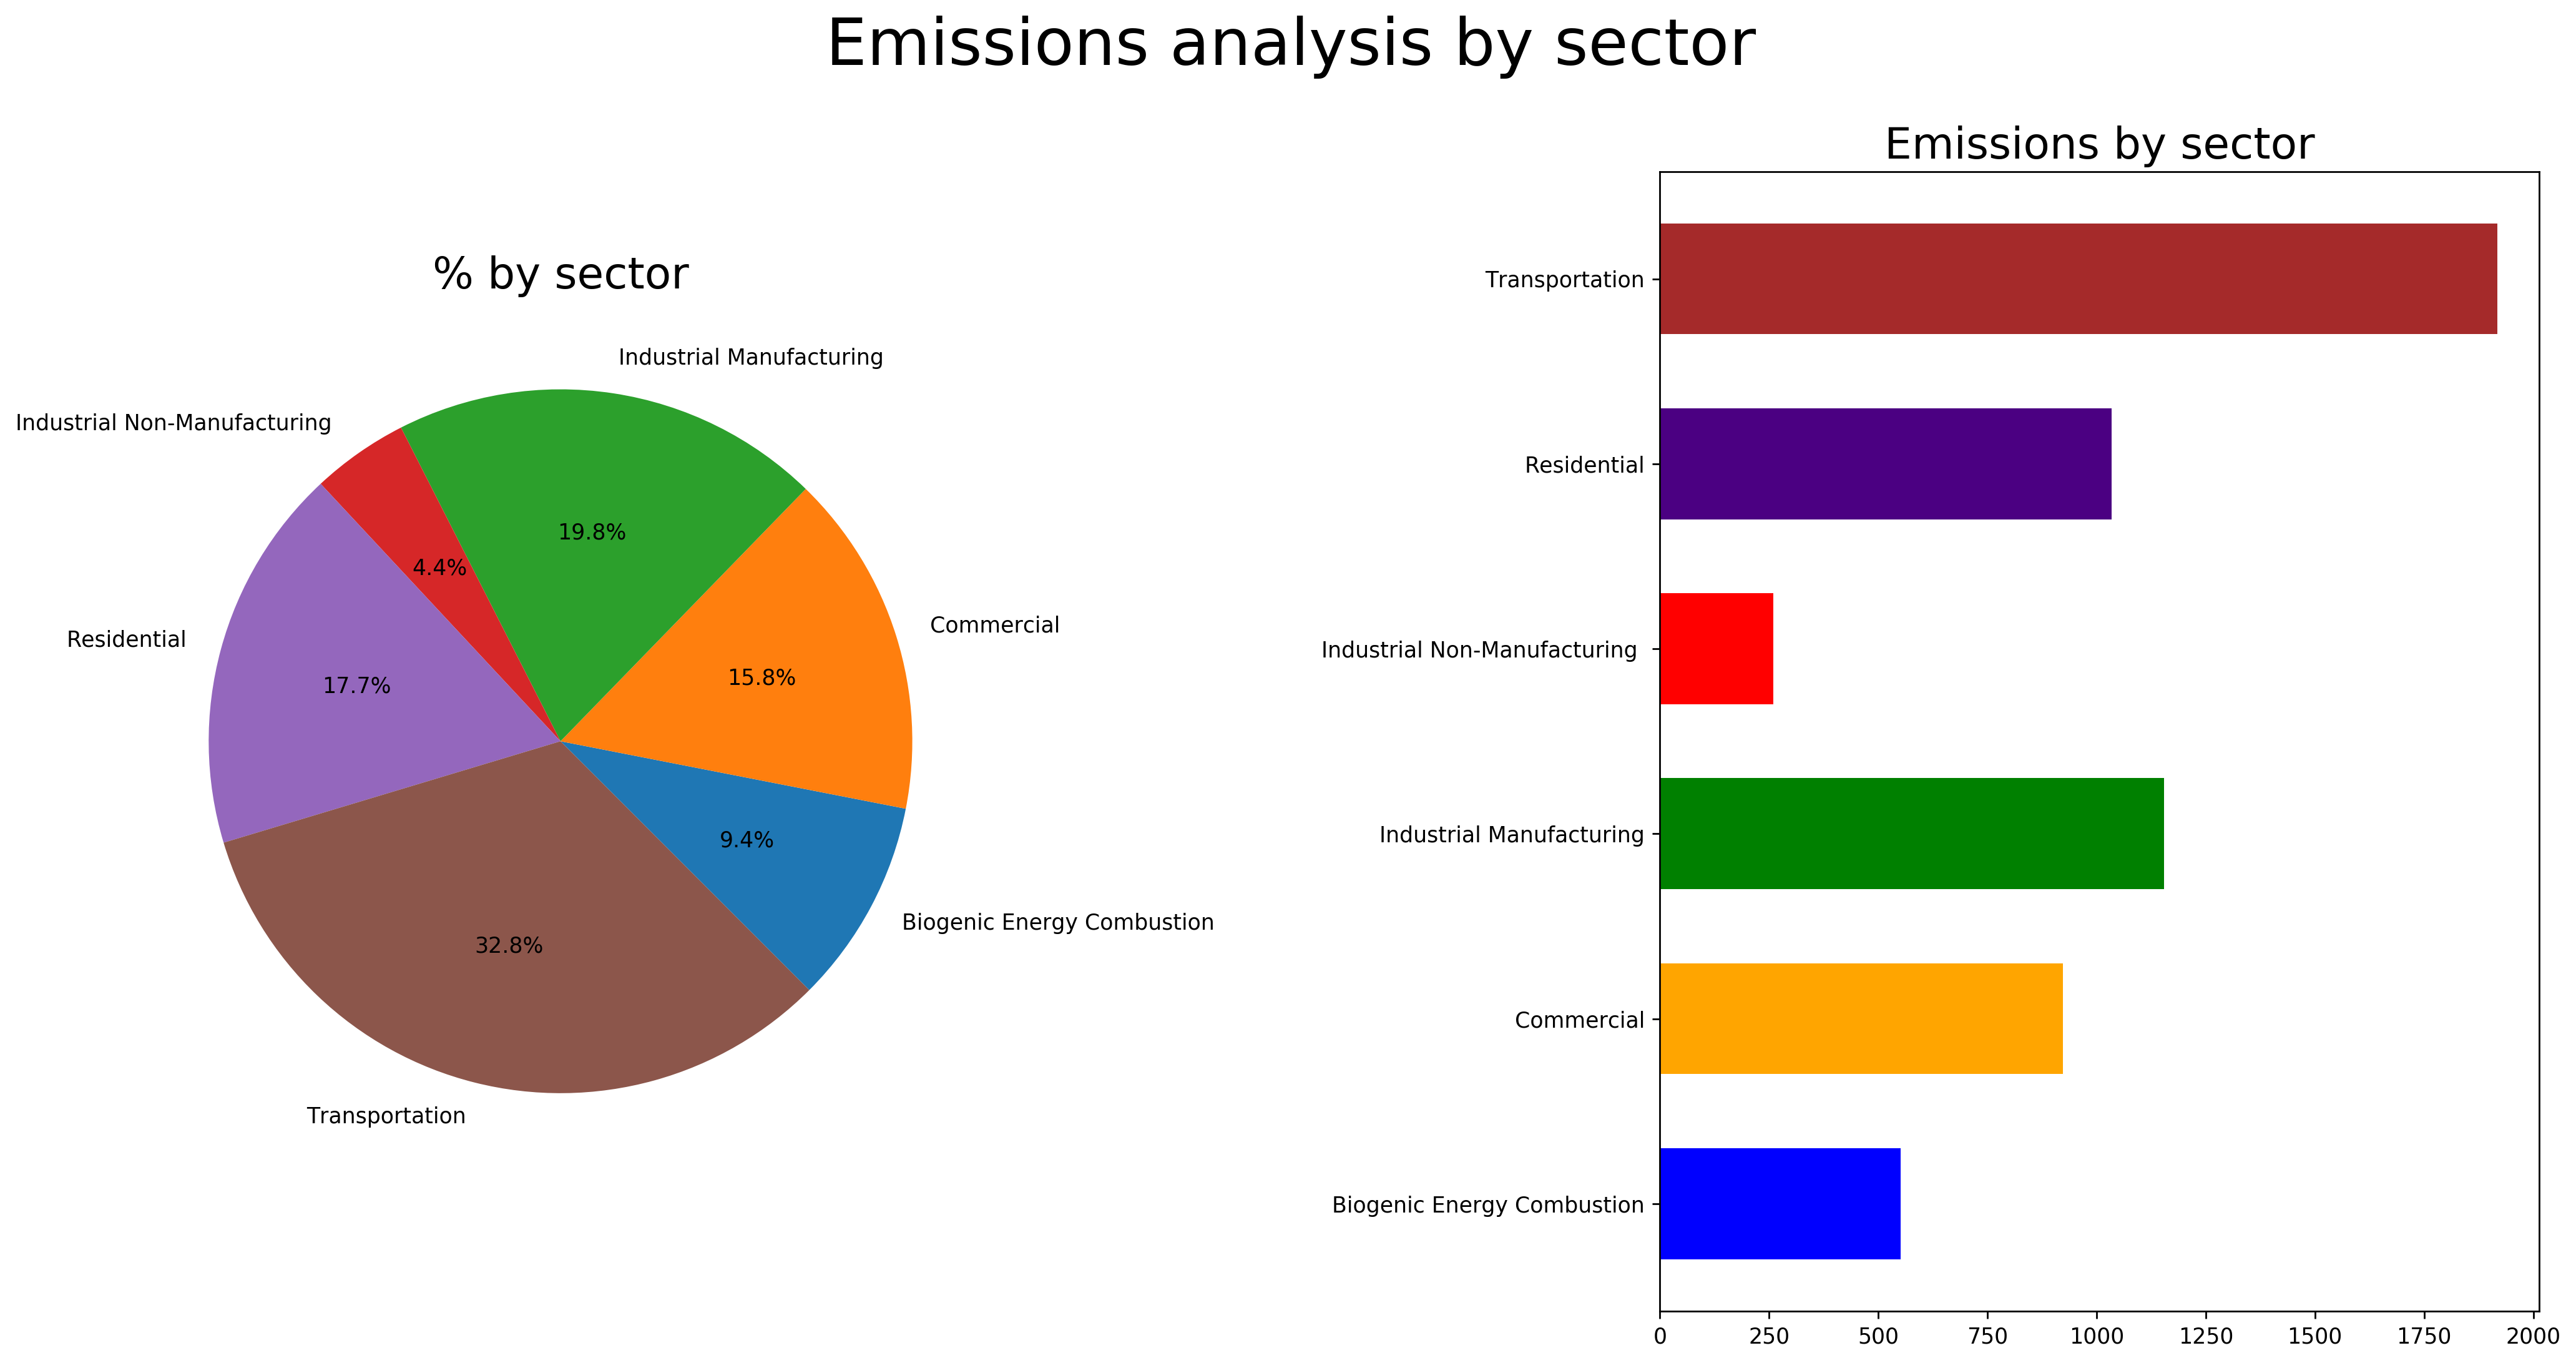

In [99]:
plt.figure(figsize=(20,10), dpi=250)
plt.suptitle("Emissions analysis by sector", fontsize=30)

plt.subplot(1,2,1)
X=by_sector['CO2 emissions']
Y=by_sector['Sector']
plt.title("% by sector", fontsize=20)
plt.pie(X, labels=Y,autopct='%.1f%%', startangle=-45)

plt.subplot(1,2,2)
colors = ['blue','orange','green','red','indigo','brown']
sizes = by_sector['CO2 emissions']
plt.barh(Y,X, color=colors, height=0.6)
plt.title('Emissions by sector', fontsize=20)

plt.subplots_adjust(bottom=0.15, wspace=0.75)
plt.show()

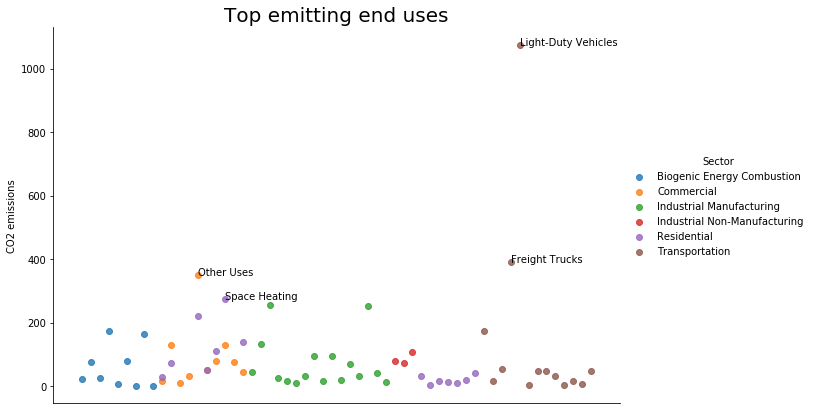

In [102]:
g=sns.lmplot(x="End Use", y="CO2 emissions", data=by_enduse, height=6, aspect=1.5, fit_reg=False, hue='Sector', legend_out=True)
g.set_axis_labels("","CO2 emissions")
g.set(xticks=[])
ax = plt.gca()
ax.set_title("Top emitting end uses", fontsize=20)
for i in range(len(by_enduse)):
    row = by_enduse.iloc[i]
    if row['CO2 emissions'] > 260:
        x = row['End Use']
        y = float(row['CO2 emissions'])
        plt.text(x, y, row['End Use'], fontsize=10)

In [32]:
pivot_df = co2_data.pivot_table(index='Sector', 
                          columns='End Use', 
                          values='CO2 emissions',
                          fill_value=0)
pivot_df

End Use,Agriculture,Air,Aluminum,Balance of Manufacturing,Biodiesel,Biofuels Heat and Coproducts,Biogenic Waste,Biomass,Bulk Chemicals,Bus Transportation,...,Renewable Diesel and Gasoline,"Shipping, Domestic","Shipping, International",Space Cooling,Space Heating,Televisions and Related Equipment,Transportation Equipment,Ventilation,Water Heating,Wood Products
Sector,,,,,,,,,,,,,,,,,,,,,
Biogenic Energy Combustion,0.00,0.00,0.00,0.00,22.61,75.8,24.3,173.22,0.00,0.00,...,1.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Commercial,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,79.41,131.14,0.00,0.00,77.69,45.03,0.00
Industrial Manufacturing,0.00,0.00,44.36,131.47,0.00,0.0,0.0,0.00,255.78,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,40.57,0.00,0.00,14.11
Industrial Non-Manufacturing,80.09,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Residential,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,111.43,273.50,40.31,0.00,0.00,139.38,0.00
Transportation,0.00,172.66,0.00,0.00,0.00,0.0,0.0,0.00,0.00,17.49,...,0.00,6.76,47.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00


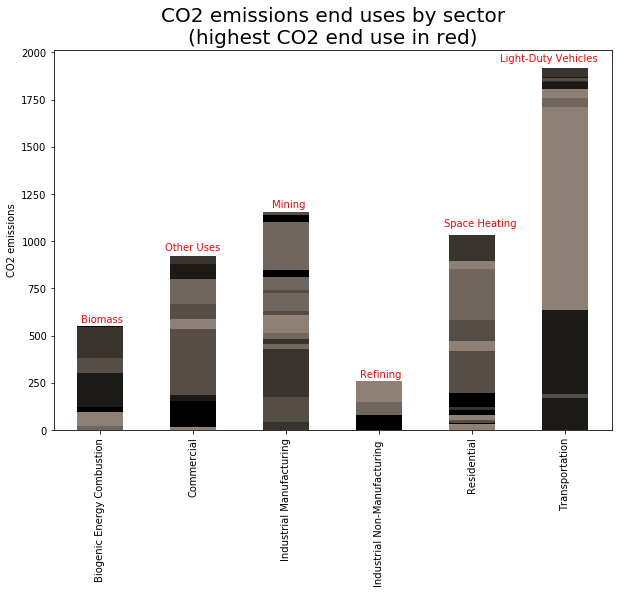

In [110]:
colors = [(i/9, i/10, i/11) for i in range(len(pivot_df))]
pivot_df.plot.bar(stacked=True, color=colors, figsize=(10,7), legend=None)
plt.title(r'CO2 emissions end uses by sector''\n' r'(highest CO2 end use in red)', fontsize=20)
plt.text(-0.2, 570, 'Biomass', fontsize=10, color='red')
plt.text(0.7, 950, 'Other Uses', fontsize=10, color='red')
plt.text(1.85, 1180, 'Mining', fontsize=10, color='red')
plt.text(2.80, 280, 'Refining', fontsize=10, color='red')
plt.text(3.70, 1080, 'Space Heating', fontsize=10, color='red')
plt.text(4.3, 1950, 'Light-Duty Vehicles', fontsize=10, color='red')
plt.ylabel('CO2 emissions')
plt.xlabel('')
plt.show()